# Topic Modelling 
modified with 
*  https://radimrehurek.com/gensim/auto_examples/tutorials/run_lda.html
* https://towardsdatascience.com/6-tips-to-optimize-an-nlp-topic-model-for-interpretability-20742f3047e2

## Import Modules




In [5]:
from pprint import pprint 

#logging 
import logging 
logging.basicConfig(format = '%(asctime)s: %(levelname)s : %(message)s',level= logging.INFO)

In [6]:
#pre-process data
import pandas as pd
import numpy as np

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import remove_stopwords, STOPWORDS
from gensim.parsing.preprocessing import strip_numeric,strip_multiple_whitespaces, strip_punctuation, strip_short, strip_tags

/usr/local/lib/python3.7/dist-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()
2021-07-28 21:04:35,009: INFO : 'pattern' package not found; tag filters are not available for English


In [7]:
#form ngrams
from gensim.models import Phrases
from gensim.corpora import Dictionary 

In [8]:
#LDA Model
from gensim.models import LdaModel

#tfidf model 
from gensim.models import TfidfModel

In [9]:
#visualisation 
!pip install pyldavis --q

In [10]:
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

### Load Data

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
df = pd.read_csv('drive/MyDrive/bbc_1807_1906_novideos.csv',encoding = 'utf-8')
df.head()

,Month,link,text,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,1901,https://www.bbc.co.uk/news/health-46638419,My name is Tim and I'm a cheese addict. But wh...,NaN,NaN,NaN,NaN
1,1901,https://www.bbc.co.uk/news/health-46720303,Children in the UK exceed the maximum recommen...,NaN,NaN,NaN,NaN
2,1901,https://www.bbc.co.uk/news/health-46746552,A clinical trial has been launched to see if a...,NaN,NaN,NaN,NaN
3,1901,https://www.bbc.co.uk/news/health-46739905,When 12-year-old Matthew Carter saw how much s...,NaN,NaN,NaN,NaN
4,1901,https://www.bbc.co.uk/news/stories-46427960,When Jessica Share bought sperm from a sperm b...,NaN,NaN,NaN,NaN


In [14]:
texts = list(df.loc[:, "text"].values)
texts[0]

'My name is Tim and I\'m a cheese addict. But what I\'ve been discovering recently has shaken me to the core. I can barely look a Babybel in the face. A half-eaten halloumi squeaklessly lies yellowing in the fridge. My cheese dreams are shattering. For, after a lifetime of unfettered devotion, could it possibly be that cheese is more foe than friend? That I am addicted to something that is not so good for my body? That cheese should be toast? These are questions that began surfacing a couple of months ago when I began making an episode for my new podcast for the BBC, All Hail Kale, looking into whether dairy was scary.  For some time, I\'d increasingly been questioning the logic of adults drinking milk.  While milk and dairy products, such as cheese and yoghurt, are good sources of protein and calcium and can form part of a healthy, balanced diet, as Dr Michael Greger, from NutritionFacts.org, put it to me: "There\'s no animal on the planet that drinks milk after weaning - and then to 

### Pre-process, tokenise, and lemmatisation

In [15]:
new_sw = ['people','say','says','said','could','one','would']
stop_words = STOPWORDS.union(set(new_sw))

In [16]:
clean_article = []

for text in texts:
  #remove new line character and punctuations 
  clean = []
  text = strip_multiple_whitespaces(text)
  text = strip_numeric(text)
  text = strip_punctuation(text)
  text = strip_tags(text)
  text = strip_short(text,minsize=3)
  text = remove_stopwords(text)
  # lower case, de-accents.  Convert the texts into a list of tokens
  for token in gensim.utils.simple_preprocess(text, deacc=True):
      clean.append(token)
  clean_article.append(clean)

In [17]:
cleaned_texts = np.array(clean_article)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [18]:
print(cleaned_texts.shape)

(712,)


In [19]:
print(cleaned_texts[0:2])

[list(['tim', 'cheese', 'addict', 'but', 'discovering', 'recently', 'shaken', 'core', 'barely', 'look', 'babybel', 'face', 'half', 'eaten', 'halloumi', 'squeaklessly', 'lies', 'yellowing', 'fridge', 'cheese', 'dreams', 'shattering', 'for', 'lifetime', 'unfettered', 'devotion', 'possibly', 'cheese', 'foe', 'friend', 'that', 'addicted', 'good', 'body', 'that', 'cheese', 'toast', 'these', 'questions', 'began', 'surfacing', 'couple', 'months', 'ago', 'began', 'making', 'episode', 'new', 'podcast', 'bbc', 'all', 'hail', 'kale', 'looking', 'dairy', 'scary', 'for', 'time', 'increasingly', 'questioning', 'logic', 'adults', 'drinking', 'milk', 'while', 'milk', 'dairy', 'products', 'cheese', 'yoghurt', 'good', 'sources', 'protein', 'calcium', 'form', 'healthy', 'balanced', 'diet', 'michael', 'greger', 'nutritionfacts', 'org', 'there', 'animal', 'planet', 'drinks', 'milk', 'weaning', 'drink', 'milk', 'species', 'sense', 'reeled', 'series', 'studies', 'showing', 'life', 'shortening', 'potential', 

In [20]:
# WORDNET LEMMATIZER (with appropriate pos tags)
  
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [21]:
lemmatizer = WordNetLemmatizer()
  
# Define function to lemmatize each word with its POS tag
  
# POS_TAGGER_FUNCTION : TYPE 1
def pos_tagger(tagged_list):
  tag_list = []
  for (word,tag) in tagged_list:
    if tag.startswith('J'):
        tag_list.append((word, wordnet.ADJ))
    elif tag.startswith('V'):
        tag_list.append((word, wordnet.VERB))
    elif tag.startswith('N'):
        tag_list.append((word, wordnet.NOUN))
    elif tag.startswith('R'):
        tag_list.append((word, wordnet.ADV))
    else:          
        tag_list.append((word, None))
  return tag_list

In [22]:
pos_list=[]
for article in cleaned_texts:
  pos_article = []
  for token in article:
    pos_article.extend(nltk.pos_tag(nltk.word_tokenize(token)))
  pos_list.append(pos_article)  

In [23]:
print(pos_list[0])

[('tim', 'NN'), ('cheese', 'NN'), ('addict', 'NN'), ('but', 'CC'), ('discovering', 'VBG'), ('recently', 'RB'), ('shaken', 'NNS'), ('core', 'NN'), ('barely', 'RB'), ('look', 'NN'), ('babybel', 'NN'), ('face', 'NN'), ('half', 'NN'), ('eaten', 'VB'), ('halloumi', 'NN'), ('squeaklessly', 'RB'), ('lies', 'NNS'), ('yellowing', 'VBG'), ('fridge', 'NN'), ('cheese', 'NN'), ('dreams', 'NNS'), ('shattering', 'VBG'), ('for', 'IN'), ('lifetime', 'NN'), ('unfettered', 'JJ'), ('devotion', 'NN'), ('possibly', 'RB'), ('cheese', 'NN'), ('foe', 'NN'), ('friend', 'NN'), ('that', 'IN'), ('addicted', 'VBN'), ('good', 'JJ'), ('body', 'NN'), ('that', 'IN'), ('cheese', 'NN'), ('toast', 'NN'), ('these', 'DT'), ('questions', 'NNS'), ('began', 'VBD'), ('surfacing', 'VBG'), ('couple', 'NN'), ('months', 'NNS'), ('ago', 'RB'), ('began', 'VBD'), ('making', 'VBG'), ('episode', 'NN'), ('new', 'JJ'), ('podcast', 'NN'), ('bbc', 'NN'), ('all', 'DT'), ('hail', 'NN'), ('kale', 'NN'), ('looking', 'VBG'), ('dairy', 'NN'), ('s

In [24]:
lem_list = []
for article in pos_list:
  new_list = pos_tagger(article)
  lem_list.append(new_list)

In [25]:
print(lem_list[0])

[('tim', 'n'), ('cheese', 'n'), ('addict', 'n'), ('but', None), ('discovering', 'v'), ('recently', 'r'), ('shaken', 'n'), ('core', 'n'), ('barely', 'r'), ('look', 'n'), ('babybel', 'n'), ('face', 'n'), ('half', 'n'), ('eaten', 'v'), ('halloumi', 'n'), ('squeaklessly', 'r'), ('lies', 'n'), ('yellowing', 'v'), ('fridge', 'n'), ('cheese', 'n'), ('dreams', 'n'), ('shattering', 'v'), ('for', None), ('lifetime', 'n'), ('unfettered', 'a'), ('devotion', 'n'), ('possibly', 'r'), ('cheese', 'n'), ('foe', 'n'), ('friend', 'n'), ('that', None), ('addicted', 'v'), ('good', 'a'), ('body', 'n'), ('that', None), ('cheese', 'n'), ('toast', 'n'), ('these', None), ('questions', 'n'), ('began', 'v'), ('surfacing', 'v'), ('couple', 'n'), ('months', 'n'), ('ago', 'r'), ('began', 'v'), ('making', 'v'), ('episode', 'n'), ('new', 'a'), ('podcast', 'n'), ('bbc', 'n'), ('all', None), ('hail', 'n'), ('kale', 'n'), ('looking', 'v'), ('dairy', 'n'), ('scary', 'a'), ('for', None), ('time', 'n'), ('increasingly', 'r'

In [26]:
lemmatized_list = []
for article in lem_list:
  lemmatized_article = []
  for (word, tag)in article:
    if tag is None:
        # if there is no available tag, append the token as is
        lemmatized_article.append(word)
    else:        
        # else use the tag to lemmatize the token
        lemmatized_article.append(lemmatizer.lemmatize(word,tag))
  lemmatized_list.append(lemmatized_article)

In [27]:
print(lemmatized_list[0])
print(lemmatized_list[1])

['tim', 'cheese', 'addict', 'but', 'discover', 'recently', 'shaken', 'core', 'barely', 'look', 'babybel', 'face', 'half', 'eat', 'halloumi', 'squeaklessly', 'lie', 'yellow', 'fridge', 'cheese', 'dream', 'shatter', 'for', 'lifetime', 'unfettered', 'devotion', 'possibly', 'cheese', 'foe', 'friend', 'that', 'addict', 'good', 'body', 'that', 'cheese', 'toast', 'these', 'question', 'begin', 'surface', 'couple', 'month', 'ago', 'begin', 'make', 'episode', 'new', 'podcast', 'bbc', 'all', 'hail', 'kale', 'look', 'dairy', 'scary', 'for', 'time', 'increasingly', 'question', 'logic', 'adult', 'drinking', 'milk', 'while', 'milk', 'dairy', 'product', 'cheese', 'yoghurt', 'good', 'source', 'protein', 'calcium', 'form', 'healthy', 'balance', 'diet', 'michael', 'greger', 'nutritionfacts', 'org', 'there', 'animal', 'planet', 'drink', 'milk', 'wean', 'drink', 'milk', 'specie', 'sense', 'reel', 'series', 'study', 'show', 'life', 'shorten', 'potential', 'drinking', 'hormonal', 'stew', 'blithely', 'assume'

## bigram 

In [28]:
bigram = gensim.models.Phrases(lemmatized_list, min_count=5, threshold=100) 
bigram_2 = gensim.models.phrases.Phraser(bigram)
bigram_words = [bigram_2[text] for text in lemmatized_list]

2021-07-28 21:05:35,680: INFO : collecting all words and their counts
2021-07-28 21:05:35,683: INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2021-07-28 21:05:36,156: INFO : collected 166705 word types from a corpus of 228519 words (unigram + bigrams) and 712 sentences
2021-07-28 21:05:36,157: INFO : using 166705 counts as vocab in Phrases<0 vocab, min_count=5, threshold=100, max_vocab_size=40000000>
2021-07-28 21:05:36,158: INFO : source_vocab length 166705
2021-07-28 21:05:37,937: INFO : Phraser built with 443 phrasegrams


In [29]:
print(bigram_words[:5])

[['tim', 'cheese', 'addict', 'but', 'discover', 'recently', 'shaken', 'core', 'barely', 'look', 'babybel', 'face', 'half', 'eat', 'halloumi', 'squeaklessly', 'lie', 'yellow', 'fridge', 'cheese', 'dream', 'shatter', 'for', 'lifetime', 'unfettered', 'devotion', 'possibly', 'cheese', 'foe', 'friend', 'that', 'addict', 'good', 'body', 'that', 'cheese', 'toast', 'these', 'question', 'begin', 'surface', 'couple', 'month', 'ago', 'begin', 'make', 'episode', 'new', 'podcast', 'bbc', 'all', 'hail', 'kale', 'look', 'dairy', 'scary', 'for', 'time', 'increasingly', 'question', 'logic', 'adult', 'drinking', 'milk', 'while', 'milk', 'dairy', 'product', 'cheese', 'yoghurt', 'good', 'source', 'protein', 'calcium', 'form', 'healthy', 'balance', 'diet', 'michael', 'greger', 'nutritionfacts', 'org', 'there', 'animal', 'planet', 'drink', 'milk', 'wean', 'drink', 'milk', 'specie', 'sense', 'reel', 'series', 'study', 'show', 'life', 'shorten', 'potential', 'drinking', 'hormonal', 'stew', 'blithely', 'assume

Remove common and rare words

In [30]:
dictionary = Dictionary (lemmatized_list)

2021-07-28 21:05:38,634: INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-07-28 21:05:38,896: INFO : built Dictionary(13949 unique tokens: ['able', 'abood', 'absorb', 'accord', 'actual']...) from 712 documents (total 228519 corpus positions)


In [47]:
dictionary.filter_extremes(no_below=5, no_above=0.7)

2021-07-28 21:07:04,680: INFO : discarding 0 tokens: []...
2021-07-28 21:07:04,683: INFO : keeping 1457 tokens which were in no less than 5 and no more than 498 (=70.0%) documents
2021-07-28 21:07:04,688: INFO : resulting dictionary: Dictionary(1457 unique tokens: ['able', 'accord', 'adult', 'ago', 'agree']...)


Build bag of words 

In [48]:
corpus = [dictionary.doc2bow(text) for text in lemmatized_list]

In [49]:
print (corpus[:1])

[[(0, 1), (1, 1), (2, 2), (3, 1), (4, 1), (5, 3), (6, 1), (7, 1), (8, 1), (9, 2), (10, 1), (11, 1), (12, 2), (13, 2), (14, 1), (15, 2), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 3), (33, 1), (34, 1), (35, 3), (36, 1), (37, 1), (38, 3), (39, 2), (40, 2), (41, 1), (42, 1), (43, 1), (44, 2), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 2), (51, 1), (52, 3), (53, 1), (54, 1), (55, 1), (56, 1), (57, 2), (58, 1), (59, 1), (60, 1), (61, 2), (62, 3), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 2), (74, 1), (75, 1), (76, 1), (77, 3), (78, 1), (79, 2), (80, 1), (81, 1), (82, 1), (83, 1), (84, 2), (85, 1), (86, 3), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 7), (93, 1), (94, 2), (95, 1), (96, 1), (97, 1), (98, 2), (99, 4), (100, 2), (101, 1), (102, 1), (103, 1), (104, 2), (105, 1), (106, 1), (107, 1), (108, 1), (109, 3), (110, 1)

In [50]:
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 1457
Number of documents: 712


In [51]:
# Human readable format of corpus (term-frequency)
[[(dictionary[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('able', 1),
  ('accord', 1),
  ('adult', 2),
  ('ago', 1),
  ('agree', 1),
  ('all', 3),
  ('and', 1),
  ('animal', 1),
  ('answer', 1),
  ('away', 2),
  ('bacteria', 1),
  ('balance', 1),
  ('bbc', 2),
  ('begin', 2),
  ('body', 1),
  ('break', 2),
  ('carry', 1),
  ('centre', 1),
  ('certainly', 1),
  ('change', 1),
  ('chemical', 1),
  ('childhood', 1),
  ('combination', 1),
  ('confirm', 1),
  ('consider', 1),
  ('consume', 1),
  ('contact', 1),
  ('contain', 1),
  ('couple', 1),
  ('daily', 1),
  ('damage', 1),
  ('david', 1),
  ('day', 3),
  ('decide', 1),
  ('diagnosis', 1),
  ('diet', 3),
  ('discover', 1),
  ('doctor', 1),
  ('drink', 3),
  ('drinking', 2),
  ('eat', 2),
  ('effect', 1),
  ('end', 1),
  ('energy', 1),
  ('enjoy', 2),
  ('expert', 1),
  ('face', 1),
  ('far', 1),
  ('figure', 1),
  ('fit', 1),
  ('for', 2),
  ('force', 1),
  ('form', 3),
  ('friend', 1),
  ('get', 1),
  ('give', 1),
  ('go', 1),
  ('good', 2),
  ('great', 1),
  ('growth', 1),
  ('half', 1),


## LDA Model 

In [52]:
lda_model = gensim.models.LdaMulticore(corpus, num_topics=6, id2word=dictionary, workers=2, passes=2, iterations = 100)

2021-07-28 21:07:19,467: INFO : using symmetric alpha at 0.16666666666666666
2021-07-28 21:07:19,469: INFO : using symmetric eta at 0.16666666666666666
2021-07-28 21:07:19,472: INFO : using serial LDA version on this node
2021-07-28 21:07:19,476: INFO : running online LDA training, 6 topics, 2 passes over the supplied corpus of 712 documents, updating every 4000 documents, evaluating every ~712 documents, iterating 100x with a convergence threshold of 0.001000
2021-07-28 21:07:19,478: WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2021-07-28 21:07:19,481: INFO : training LDA model using 2 processes
2021-07-28 21:07:19,537: INFO : PROGRESS: pass 0, dispatched chunk #0 = documents up to #712/712, outstanding queue size 1
2021-07-28 21:07:22,092: INFO : topic #0 (0.167): 0.009*"child" + 0.006*"report" + 0.006*"study" + 0.006*"meat" + 0.005*"patient" + 0.005*"test" + 0.005*"food" + 0.005*"hospital" + 0.005*

In [53]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

2021-07-28 21:07:27,270: INFO : topic #0 (0.167): 0.009*"child" + 0.007*"meat" + 0.006*"report" + 0.006*"food" + 0.006*"product" + 0.005*"study" + 0.005*"hospital" + 0.005*"country" + 0.005*"old" + 0.005*"week"
2021-07-28 21:07:27,277: INFO : topic #1 (0.167): 0.014*"woman" + 0.009*"go" + 0.009*"cancer" + 0.008*"know" + 0.008*"like" + 0.007*"feel" + 0.006*"get" + 0.006*"come" + 0.006*"thing" + 0.006*"look"
2021-07-28 21:07:27,281: INFO : topic #2 (0.167): 0.013*"patient" + 0.010*"drug" + 0.009*"cancer" + 0.008*"treatment" + 0.008*"woman" + 0.007*"study" + 0.007*"brain" + 0.006*"new" + 0.006*"risk" + 0.006*"disease"
2021-07-28 21:07:27,284: INFO : topic #3 (0.167): 0.009*"child" + 0.007*"work" + 0.007*"she" + 0.006*"patient" + 0.006*"doctor" + 0.006*"family" + 0.006*"care" + 0.005*"baby" + 0.005*"day" + 0.005*"woman"
2021-07-28 21:07:27,287: INFO : topic #4 (0.167): 0.012*"cancer" + 0.009*"child" + 0.007*"case" + 0.007*"risk" + 0.006*"report" + 0.006*"woman" + 0.006*"england" + 0.005*"y

Topic: 0 
Words: 0.009*"child" + 0.007*"meat" + 0.006*"report" + 0.006*"food" + 0.006*"product" + 0.005*"study" + 0.005*"hospital" + 0.005*"country" + 0.005*"old" + 0.005*"week"
Topic: 1 
Words: 0.014*"woman" + 0.009*"go" + 0.009*"cancer" + 0.008*"know" + 0.008*"like" + 0.007*"feel" + 0.006*"get" + 0.006*"come" + 0.006*"thing" + 0.006*"look"
Topic: 2 
Words: 0.013*"patient" + 0.010*"drug" + 0.009*"cancer" + 0.008*"treatment" + 0.008*"woman" + 0.007*"study" + 0.007*"brain" + 0.006*"new" + 0.006*"risk" + 0.006*"disease"
Topic: 3 
Words: 0.009*"child" + 0.007*"work" + 0.007*"she" + 0.006*"patient" + 0.006*"doctor" + 0.006*"family" + 0.006*"care" + 0.005*"baby" + 0.005*"day" + 0.005*"woman"
Topic: 4 
Words: 0.012*"cancer" + 0.009*"child" + 0.007*"case" + 0.007*"risk" + 0.006*"report" + 0.006*"woman" + 0.006*"england" + 0.005*"young" + 0.005*"lead" + 0.005*"age"
Topic: 5 
Words: 0.018*"child" + 0.014*"food" + 0.011*"study" + 0.009*"diet" + 0.007*"eat" + 0.006*"screen" + 0.006*"calorie" + 0.

In [55]:
from gensim.models import CoherenceModel
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=lemmatized_list, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

2021-07-28 21:07:48,967: INFO : -6.856 per-word bound, 115.9 perplexity estimate based on a held-out corpus of 712 documents with 150970 words
2021-07-28 21:07:48,973: INFO : using WordOccurrenceAccumulator to estimate probabilities from sliding windows
2021-07-28 21:07:49,008: INFO : WordOccurrenceAccumulator accumulated stats from 1000 documents
2021-07-28 21:07:49,042: INFO : WordOccurrenceAccumulator accumulated stats from 2000 documents
2021-07-28 21:07:49,077: INFO : WordOccurrenceAccumulator accumulated stats from 3000 documents
2021-07-28 21:07:49,116: INFO : WordOccurrenceAccumulator accumulated stats from 4000 documents
2021-07-28 21:07:49,147: INFO : WordOccurrenceAccumulator accumulated stats from 5000 documents
2021-07-28 21:07:49,180: INFO : WordOccurrenceAccumulator accumulated stats from 6000 documents



Perplexity:  -6.8561909047647


2021-07-28 21:07:49,218: INFO : WordOccurrenceAccumulator accumulated stats from 7000 documents
2021-07-28 21:07:49,248: INFO : WordOccurrenceAccumulator accumulated stats from 8000 documents
2021-07-28 21:07:49,282: INFO : WordOccurrenceAccumulator accumulated stats from 9000 documents
2021-07-28 21:07:49,315: INFO : WordOccurrenceAccumulator accumulated stats from 10000 documents
2021-07-28 21:07:49,347: INFO : WordOccurrenceAccumulator accumulated stats from 11000 documents
2021-07-28 21:07:49,378: INFO : WordOccurrenceAccumulator accumulated stats from 12000 documents
2021-07-28 21:07:49,413: INFO : WordOccurrenceAccumulator accumulated stats from 13000 documents
2021-07-28 21:07:49,447: INFO : WordOccurrenceAccumulator accumulated stats from 14000 documents
2021-07-28 21:07:49,488: INFO : WordOccurrenceAccumulator accumulated stats from 15000 documents
2021-07-28 21:07:49,525: INFO : WordOccurrenceAccumulator accumulated stats from 16000 documents
2021-07-28 21:07:49,571: INFO : W


Coherence Score:  0.31663058368047287


In [56]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.010488  0.010309       1        1  21.825109
1      0.043101 -0.029878       2        1  20.918279
2      0.018265  0.007100       3        1  20.632215
4      0.005789  0.021401       4        1  14.347352
5     -0.049558 -0.031447       5        1  11.632238
0     -0.028085  0.022515       6        1  10.644806, topic_info=         Term         Freq        Total Category  logprob  loglift
192      food   437.000000   437.000000  Default  30.0000  30.0000
176     child  1117.000000  1117.000000  Default  29.0000  29.0000
35       diet   253.000000   253.000000  Default  28.0000  28.0000
1241     meat   160.000000   160.000000  Default  27.0000  27.0000
261    cancer   971.000000   971.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
95        new    62.014109   629.089134   Topic6  -5.5574  -0.0768
299   patient    67.418731   846.708877   Topic6  -5.4738  -0.2903
73       know    61.084877   641.461319   Topic6  -5.5725  -0.1114
37     doctor    59.711113   586.242265   Topic6  -5.5952  -0.0441
56         go    60.751092   733.991874   Topic6  -5.5780  -0.2516

[408 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
694       1  0.220108  activity
694       2  0.075899  activity
694       3  0.174568  activity
694       4  0.197338  activity
694       5  0.060719  activity
...     ...       ...       ...
603       2  0.187305     young
603       3  0.072425     young
603       4  0.292196     young
603       5  0.127368     young
603       6  0.104891     young

[1677 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 3, 5, 6, 1])

## Find optimal number of topics 

In [57]:
coherence_values = []
model_list = []
for num_topics in range(2, 20, 2):
    model = gensim.models.LdaMulticore(corpus, num_topics=num_topics, id2word=dictionary, workers=2, passes=2, iterations = 100)
    model_list.append(model)
    coherencemodel = CoherenceModel(model=model, texts=lemmatized_list, dictionary=dictionary, coherence='c_v')
    coherence_values.append(coherencemodel.get_coherence())

2021-07-28 21:08:27,876: INFO : using symmetric alpha at 0.5
2021-07-28 21:08:27,877: INFO : using symmetric eta at 0.5
2021-07-28 21:08:27,881: INFO : using serial LDA version on this node
2021-07-28 21:08:27,889: INFO : running online LDA training, 2 topics, 2 passes over the supplied corpus of 712 documents, updating every 4000 documents, evaluating every ~712 documents, iterating 100x with a convergence threshold of 0.001000
2021-07-28 21:08:27,892: WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2021-07-28 21:08:27,894: INFO : training LDA model using 2 processes
2021-07-28 21:08:27,946: INFO : PROGRESS: pass 0, dispatched chunk #0 = documents up to #712/712, outstanding queue size 1
2021-07-28 21:08:30,278: INFO : topic #0 (0.500): 0.007*"child" + 0.006*"woman" + 0.006*"study" + 0.006*"work" + 0.006*"patient" + 0.006*"risk" + 0.005*"like" + 0.005*"go" + 0.005*"she" + 0.005*"day"
2021-07-28 21:08:30

In [58]:
# Print the coherence scores
for m, cv in zip(range(2,20,2), coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.2706
Num Topics = 4  has Coherence Value of 0.3042
Num Topics = 6  has Coherence Value of 0.2961
Num Topics = 8  has Coherence Value of 0.3059
Num Topics = 10  has Coherence Value of 0.3133
Num Topics = 12  has Coherence Value of 0.3093
Num Topics = 14  has Coherence Value of 0.3107
Num Topics = 16  has Coherence Value of 0.3028
Num Topics = 18  has Coherence Value of 0.305


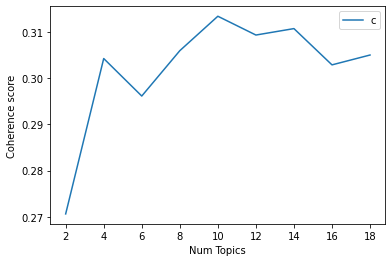

In [59]:
# Show graph
plt.plot(range(2,20,2), coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

## Optimal Model


In [60]:
optimal_model = model_list[4]
# optimal_model = lda_model
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

2021-07-28 21:12:07,641: INFO : topic #0 (0.100): 0.010*"woman" + 0.009*"patient" + 0.008*"child" + 0.008*"she" + 0.007*"baby" + 0.007*"doctor" + 0.007*"go" + 0.006*"take" + 0.006*"told" + 0.006*"know"
2021-07-28 21:12:07,643: INFO : topic #1 (0.100): 0.010*"woman" + 0.009*"heart" + 0.009*"risk" + 0.008*"child" + 0.007*"study" + 0.007*"nh" + 0.007*"age" + 0.006*"cause" + 0.006*"care" + 0.006*"disease"
2021-07-28 21:12:07,647: INFO : topic #2 (0.100): 0.011*"food" + 0.009*"study" + 0.007*"change" + 0.007*"diet" + 0.006*"like" + 0.006*"eat" + 0.005*"child" + 0.005*"meat" + 0.005*"product" + 0.005*"go"
2021-07-28 21:12:07,650: INFO : topic #3 (0.100): 0.011*"go" + 0.009*"she" + 0.007*"like" + 0.007*"come" + 0.006*"child" + 0.006*"baby" + 0.006*"day" + 0.006*"treatment" + 0.006*"get" + 0.006*"study"
2021-07-28 21:12:07,654: INFO : topic #4 (0.100): 0.013*"child" + 0.010*"mental" + 0.008*"social" + 0.008*"young" + 0.007*"parent" + 0.006*"study" + 0.006*"use" + 0.006*"cannabis" + 0.006*"weig

[(0,
  '0.010*"woman" + 0.009*"patient" + 0.008*"child" + 0.008*"she" + '
  '0.007*"baby" + 0.007*"doctor" + 0.007*"go" + 0.006*"take" + 0.006*"told" + '
  '0.006*"know"'),
 (1,
  '0.010*"woman" + 0.009*"heart" + 0.009*"risk" + 0.008*"child" + '
  '0.007*"study" + 0.007*"nh" + 0.007*"age" + 0.006*"cause" + 0.006*"care" + '
  '0.006*"disease"'),
 (2,
  '0.011*"food" + 0.009*"study" + 0.007*"change" + 0.007*"diet" + 0.006*"like" '
  '+ 0.006*"eat" + 0.005*"child" + 0.005*"meat" + 0.005*"product" + '
  '0.005*"go"'),
 (3,
  '0.011*"go" + 0.009*"she" + 0.007*"like" + 0.007*"come" + 0.006*"child" + '
  '0.006*"baby" + 0.006*"day" + 0.006*"treatment" + 0.006*"get" + '
  '0.006*"study"'),
 (4,
  '0.013*"child" + 0.010*"mental" + 0.008*"social" + 0.008*"young" + '
  '0.007*"parent" + 0.006*"study" + 0.006*"use" + 0.006*"cannabis" + '
  '0.006*"weight" + 0.006*"problem"'),
 (5,
  '0.014*"blood" + 0.009*"risk" + 0.008*"woman" + 0.007*"treatment" + '
  '0.006*"nh" + 0.006*"patient" + 0.006*"high"

In [61]:
pyLDAvis.gensim_models.prepare(optimal_model, corpus, dictionary)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.006434  0.024874       1        1  16.615640
7     -0.033452 -0.002780       2        1  12.286222
1     -0.001792 -0.007929       3        1  11.980523
8      0.039705  0.031431       4        1  11.453150
2      0.009514 -0.019178       5        1   9.948483
6     -0.028880 -0.003536       6        1   9.633473
3      0.020632  0.040132       7        1   7.750561
9     -0.005509 -0.000909       8        1   7.579199
4      0.051068 -0.053798       9        1   6.624673
5     -0.057721 -0.008306      10        1   6.128076, topic_info=            Term         Freq        Total Category  logprob  loglift
261       cancer   944.000000   944.000000  Default  30.0000  30.0000
1344     vaccine   239.000000   239.000000  Default  29.0000  29.0000
258        blood   475.000000   475.000000  Default  28.0000  28.0000
1136         hiv   253.000000   253.000000  Default  27.0000  27.0000
176        child  1138.000000  1138.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
893         drug    40.340459   574.052305  Topic10  -5.4352   0.1369
55          give    38.621388   514.555011  Topic10  -5.4787   0.2028
284      include    36.205299   549.007721  Topic10  -5.5433   0.0734
156   university    34.878663   491.289063  Topic10  -5.5807   0.1471
248         work    35.455747   751.305088  Topic10  -5.5643  -0.2612

[674 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
1         1  0.133839  accord
1         2  0.099423  accord
1         3  0.107071  accord
1         4  0.068831  accord
1         5  0.091775  accord
...     ...       ...     ...
603       6  0.090187   young
603       7  0.040347   young
603       8  0.068827   young
603       9  0.196987   young
603      10  0.028480   young

[4167 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 8, 2, 9, 3, 7, 4, 10, 5, 6])

In [63]:
# Compute Perplexity
print('\nPerplexity: ', optimal_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_ldatfidf = CoherenceModel(model=optimal_model, texts=lemmatized_list, dictionary=dictionary, coherence='c_v')
coherence_ldatfidf = coherence_model_ldatfidf.get_coherence()
print('\nCoherence Score: ', coherence_ldatfidf)

2021-07-28 21:12:28,392: INFO : -6.919 per-word bound, 121.0 perplexity estimate based on a held-out corpus of 712 documents with 150970 words
2021-07-28 21:12:28,401: INFO : using WordOccurrenceAccumulator to estimate probabilities from sliding windows
2021-07-28 21:12:28,428: INFO : WordOccurrenceAccumulator accumulated stats from 1000 documents
2021-07-28 21:12:28,458: INFO : WordOccurrenceAccumulator accumulated stats from 2000 documents
2021-07-28 21:12:28,493: INFO : WordOccurrenceAccumulator accumulated stats from 3000 documents
2021-07-28 21:12:28,533: INFO : WordOccurrenceAccumulator accumulated stats from 4000 documents
2021-07-28 21:12:28,567: INFO : WordOccurrenceAccumulator accumulated stats from 5000 documents



Perplexity:  -6.919029467899989


2021-07-28 21:12:28,604: INFO : WordOccurrenceAccumulator accumulated stats from 6000 documents
2021-07-28 21:12:28,639: INFO : WordOccurrenceAccumulator accumulated stats from 7000 documents
2021-07-28 21:12:28,668: INFO : WordOccurrenceAccumulator accumulated stats from 8000 documents
2021-07-28 21:12:28,706: INFO : WordOccurrenceAccumulator accumulated stats from 9000 documents
2021-07-28 21:12:28,751: INFO : WordOccurrenceAccumulator accumulated stats from 10000 documents
2021-07-28 21:12:28,784: INFO : WordOccurrenceAccumulator accumulated stats from 11000 documents
2021-07-28 21:12:28,820: INFO : WordOccurrenceAccumulator accumulated stats from 12000 documents
2021-07-28 21:12:28,861: INFO : WordOccurrenceAccumulator accumulated stats from 13000 documents
2021-07-28 21:12:28,899: INFO : WordOccurrenceAccumulator accumulated stats from 14000 documents
2021-07-28 21:12:28,938: INFO : WordOccurrenceAccumulator accumulated stats from 15000 documents
2021-07-28 21:12:28,976: INFO : Wo


Coherence Score:  0.3133305971660307


# TFIDF

In [64]:
tfidf =  gensim.models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]
for i in corpus_tfidf[0]:
  print(i)

2021-07-28 21:12:34,366: INFO : collecting document frequencies
2021-07-28 21:12:34,368: INFO : PROGRESS: processing document #0
2021-07-28 21:12:34,394: INFO : calculating IDF weights for 712 documents and 1456 features (93221 matrix non-zeros)


(0, 0.028176310648774103)
(1, 0.02795297183457062)
(2, 0.07387378281211068)
(3, 0.03964033567701256)
(4, 0.0575207755144643)
(5, 0.15722662280361757)
(6, 0.020367801493681236)
(7, 0.06551248540230944)
(8, 0.055813571667377763)
(9, 0.07703503057190991)
(10, 0.07230467735441115)
(11, 0.06425749627308915)
(12, 0.039507969379679195)
(13, 0.06758930475997728)
(14, 0.024856433837065733)
(15, 0.11001724194597666)
(16, 0.03279580342411819)
(17, 0.045840355726086454)
(18, 0.06979252281293517)
(19, 0.0195282824580627)
(20, 0.06684596095632353)
(21, 0.05842851513969827)
(22, 0.06425749627308915)
(23, 0.055813571667377763)
(24, 0.03562394392087277)
(25, 0.060882789966225745)
(26, 0.04978048694898685)
(27, 0.051720793246002185)
(28, 0.047719565843056796)
(29, 0.05105421831304192)
(30, 0.038700595052722934)
(31, 0.06425749627308915)
(32, 0.055089863448718926)
(33, 0.04558491959676675)
(34, 0.052062059116376694)
(35, 0.13987664553267906)
(36, 0.05708099370972745)
(37, 0.023193618480234764)
(38, 0.144

In [65]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

2021-07-28 21:12:49,334: INFO : using symmetric alpha at 0.1
2021-07-28 21:12:49,340: INFO : using symmetric eta at 0.1
2021-07-28 21:12:49,342: INFO : using serial LDA version on this node
2021-07-28 21:12:49,350: INFO : running online LDA training, 10 topics, 2 passes over the supplied corpus of 712 documents, updating every 8000 documents, evaluating every ~712 documents, iterating 50x with a convergence threshold of 0.001000
2021-07-28 21:12:49,355: WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2021-07-28 21:12:49,357: INFO : training LDA model using 4 processes
2021-07-28 21:12:49,933: INFO : PROGRESS: pass 0, dispatched chunk #0 = documents up to #712/712, outstanding queue size 1
2021-07-28 21:12:51,374: INFO : topic #6 (0.100): 0.007*"cancer" + 0.004*"food" + 0.004*"vaccine" + 0.004*"infection" + 0.004*"child" + 0.003*"test" + 0.003*"baby" + 0.003*"eat" + 0.003*"pain" + 0.003*"boy"
2021-07-28 2

Topic: 0 Word: 0.006*"heart" + 0.006*"stroke" + 0.005*"breast" + 0.005*"cancer" + 0.004*"study" + 0.004*"blood" + 0.004*"woman" + 0.004*"disease" + 0.004*"risk" + 0.004*"patient"
Topic: 1 Word: 0.006*"cigarette" + 0.006*"cannabis" + 0.005*"vitamin" + 0.005*"smoking" + 0.005*"product" + 0.004*"cancer" + 0.004*"drug" + 0.004*"supplement" + 0.003*"food" + 0.003*"ban"
Topic: 2 Word: 0.009*"cancer" + 0.004*"vaccination" + 0.004*"woman" + 0.003*"child" + 0.003*"nh" + 0.003*"drink" + 0.003*"obesity" + 0.003*"disease" + 0.003*"social" + 0.003*"gene"
Topic: 3 Word: 0.009*"sugar" + 0.007*"meat" + 0.004*"cannabis" + 0.004*"outbreak" + 0.004*"food" + 0.004*"child" + 0.004*"young" + 0.004*"china" + 0.003*"school" + 0.003*"country"
Topic: 4 Word: 0.006*"baby" + 0.005*"woman" + 0.004*"child" + 0.004*"donor" + 0.004*"birth" + 0.003*"pregnancy" + 0.003*"blood" + 0.003*"screen" + 0.003*"go" + 0.003*"she"
Topic: 5 Word: 0.006*"brain" + 0.004*"heart" + 0.004*"patient" + 0.003*"child" + 0.003*"mental" + 0.

In [66]:
# Compute Perplexity
print('\nPerplexity: ', lda_model_tfidf.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_ldatfidf = CoherenceModel(model=lda_model_tfidf, texts=lemmatized_list, dictionary=dictionary, coherence='c_v')
coherence_ldatfidf = coherence_model_ldatfidf.get_coherence()
print('\nCoherence Score: ', coherence_ldatfidf)

2021-07-28 21:13:01,744: INFO : -7.575 per-word bound, 190.7 perplexity estimate based on a held-out corpus of 712 documents with 150970 words
2021-07-28 21:13:01,754: INFO : using WordOccurrenceAccumulator to estimate probabilities from sliding windows
2021-07-28 21:13:01,783: INFO : WordOccurrenceAccumulator accumulated stats from 1000 documents
2021-07-28 21:13:01,810: INFO : WordOccurrenceAccumulator accumulated stats from 2000 documents
2021-07-28 21:13:01,844: INFO : WordOccurrenceAccumulator accumulated stats from 3000 documents
2021-07-28 21:13:01,874: INFO : WordOccurrenceAccumulator accumulated stats from 4000 documents
2021-07-28 21:13:01,903: INFO : WordOccurrenceAccumulator accumulated stats from 5000 documents
2021-07-28 21:13:01,929: INFO : WordOccurrenceAccumulator accumulated stats from 6000 documents



Perplexity:  -7.575316353956659


2021-07-28 21:13:01,959: INFO : WordOccurrenceAccumulator accumulated stats from 7000 documents
2021-07-28 21:13:01,985: INFO : WordOccurrenceAccumulator accumulated stats from 8000 documents
2021-07-28 21:13:02,021: INFO : WordOccurrenceAccumulator accumulated stats from 9000 documents
2021-07-28 21:13:02,050: INFO : WordOccurrenceAccumulator accumulated stats from 10000 documents
2021-07-28 21:13:02,078: INFO : WordOccurrenceAccumulator accumulated stats from 11000 documents
2021-07-28 21:13:02,109: INFO : WordOccurrenceAccumulator accumulated stats from 12000 documents
2021-07-28 21:13:02,141: INFO : WordOccurrenceAccumulator accumulated stats from 13000 documents
2021-07-28 21:13:02,166: INFO : WordOccurrenceAccumulator accumulated stats from 14000 documents
2021-07-28 21:13:02,200: INFO : WordOccurrenceAccumulator accumulated stats from 15000 documents
2021-07-28 21:13:02,233: INFO : WordOccurrenceAccumulator accumulated stats from 16000 documents
2021-07-28 21:13:02,258: INFO : W


Coherence Score:  0.29184999920995813



## -----------------------Rewrite 




# Dominant topic in each sentence 

In [67]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=texts)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,2.0,0.6494,"food, study, change, diet, like, eat, child, m...",My name is Tim and I'm a cheese addict. But wh...
1,1,2.0,0.9956,"food, study, change, diet, like, eat, child, m...",Children in the UK exceed the maximum recommen...
2,2,7.0,0.9960,"cancer, patient, treatment, risk, research, st...",A clinical trial has been launched to see if a...
3,3,2.0,0.6840,"food, study, change, diet, like, eat, child, m...",When 12-year-old Matthew Carter saw how much s...
4,4,8.0,0.7474,"like, child, she, work, go, woman, doctor, kno...",When Jessica Share bought sperm from a sperm b...
5,5,6.0,0.9945,"vaccine, child, hiv, case, disease, test, worl...",Scientists have found the most likely source o...
6,6,0.0,0.7898,"woman, patient, child, she, baby, doctor, go, ...",A month-long campaign encouraging women to gro...
7,7,4.0,0.8590,"child, mental, social, young, parent, study, u...",There is little evidence screen use for childr...
8,8,3.0,0.2491,"go, she, like, come, child, baby, day, treatme...",Authorities investigating the death of an 11-y...
9,9,4.0,0.5403,"child, mental, social, young, parent, study, u...",New guidance from the Royal College of Paediat...


# Find the most representative document for each topic

In [68]:
# Group top 5 sentences under each topic
sent_topics_sorteddf= pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf = pd.concat([sent_topics_sorteddf, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf.head()

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.9986,"woman, patient, child, she, baby, doctor, go, ...",It's not unusual for Dutch patients with demen...
1,1.0,0.9968,"woman, heart, risk, child, study, nh, age, cau...",Psychotic experiences - such as hearing voices...
2,2.0,0.9979,"food, study, change, diet, like, eat, child, m...",Is it really possible to reduce violent crime ...
3,3.0,0.9972,"go, she, like, come, child, baby, day, treatme...","For four years, Gavin, 31, struggled to go fur..."
4,4.0,0.9968,"child, mental, social, young, parent, study, u...",Very little progress has been made in reducing...


## Topic distribution across documents

In [69]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics


,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,2.0,"food, study, change, diet, like, eat, child, m...",111.0,0.1559
1.0,2.0,"food, study, change, diet, like, eat, child, m...",81.0,0.1138
2.0,7.0,"cancer, patient, treatment, risk, research, st...",71.0,0.0997
3.0,2.0,"food, study, change, diet, like, eat, child, m...",55.0,0.0772
4.0,8.0,"like, child, she, work, go, woman, doctor, kno...",48.0,0.0674
...,...,...,...,...
707.0,4.0,"child, mental, social, young, parent, study, u...",NaN,NaN
708.0,1.0,"woman, heart, risk, child, study, nh, age, cau...",NaN,NaN
709.0,4.0,"child, mental, social, young, parent, study, u...",NaN,NaN
710.0,4.0,"child, mental, social, young, parent, study, u...",NaN,NaN


# Trigram 

In [ ]:
trigram = gensim.models.Phrases(bigram[cleaned_texts], threshold=100) 
trigram_2 = gensim.models.phrases.Phraser(trigram)
trigram_words = [trigram_2[text] for text in cleaned_texts]

In [ ]:
lemmatized_texts_trigram= [[lemmatizer.lemmatize(element) for element in text] for text in trigram_words]

print(lemmatized_texts_trigram[0])

In [ ]:
# Create Dictionary
dictionary_trigram = Dictionary(lemmatized_texts_trigram)
dictionary_trigram.filter_extremes(no_below=5, no_above=0.7)

# Create Corpus
corpus_trigram = [dictionary_trigram.doc2bow(text) for text in lemmatized_texts_trigram]
print('Number of unique tokens: %d' % len(dictionary_trigram))
print('Number of documents: %d' % len(corpus_trigram))

# Term Document Frequency
corpus_trigram = [dictionary_trigram.doc2bow(text) for text in lemmatized_texts_trigram]

# View
print(corpus_trigram[:1])

In [ ]:
lda_model_trigram = gensim.models.LdaMulticore(corpus_trigram, num_topics=6, id2word=dictionary_trigram, workers=2, passes=2, iterations = 100)

In [ ]:
pprint(lda_model_trigram.print_topics())

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model_trigram.log_perplexity(corpus_trigram))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda_tri = CoherenceModel(model=lda_model_trigram, texts=lemmatized_texts_trigram, dictionary=dictionary_trigram, coherence='c_v')
coherence_lda_tri = coherence_model_lda_tri.get_coherence()
print('\nCoherence Score: ', coherence_lda_tri)

In [ ]:
pyLDAvis.gensim_models.prepare(lda_model_trigram, corpus_trigram, dictionary_trigram)

# Modifications 
* https://towardsdatascience.com/6-tips-to-optimize-an-nlp-topic-model-for-interpretability-20742f3047e2